In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

## Load data from CSV file

In [268]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Extract the features and target variable

In [269]:
data=data.drop(['Name','Cabin','Embarked'],axis=1)
print(data.columns)
data = data.dropna()
X = data.drop('Survived', axis=1)
y = data['Survived']

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')


## Convert categorical variables to numerical labels

In [270]:
X = pd.get_dummies(X)

In [272]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,887,2,27.0,0,0,13.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split the data in to training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

## Create a decision tree classifier with pruning

In [248]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)  # Adjust max_depth as needed
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

## Create a decision tree classifier

In [258]:
clf = DecisionTreeClassifier(criterion ='entropy')
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

## Predict the target variable for the test set

In [259]:
y_pred = clf.predict(X_test)

## generate the Confusion matrix

In [260]:
confusion_mat = confusion_matrix(y_test,y_pred)

## Convert the confusion matrix to a DataFrame for visualization

In [262]:
confusion_df = pd.DataFrame(confusion_mat, index=['No', 'Yes'],columns=['No','Yes'])

## Create a heatmap of the consfusion matrix

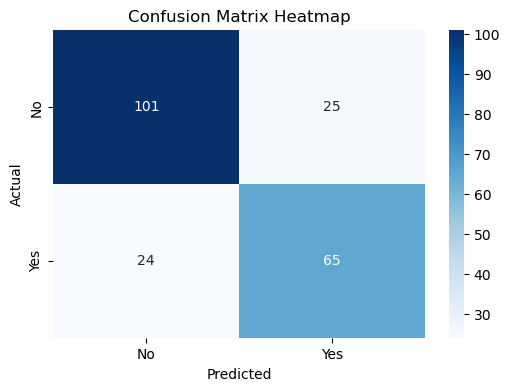

In [263]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.savefig('confusion_matrix_maxdepth17.png',dpi=200)  # Save the plot as an image
plt.show()

## Create the Decision Tree

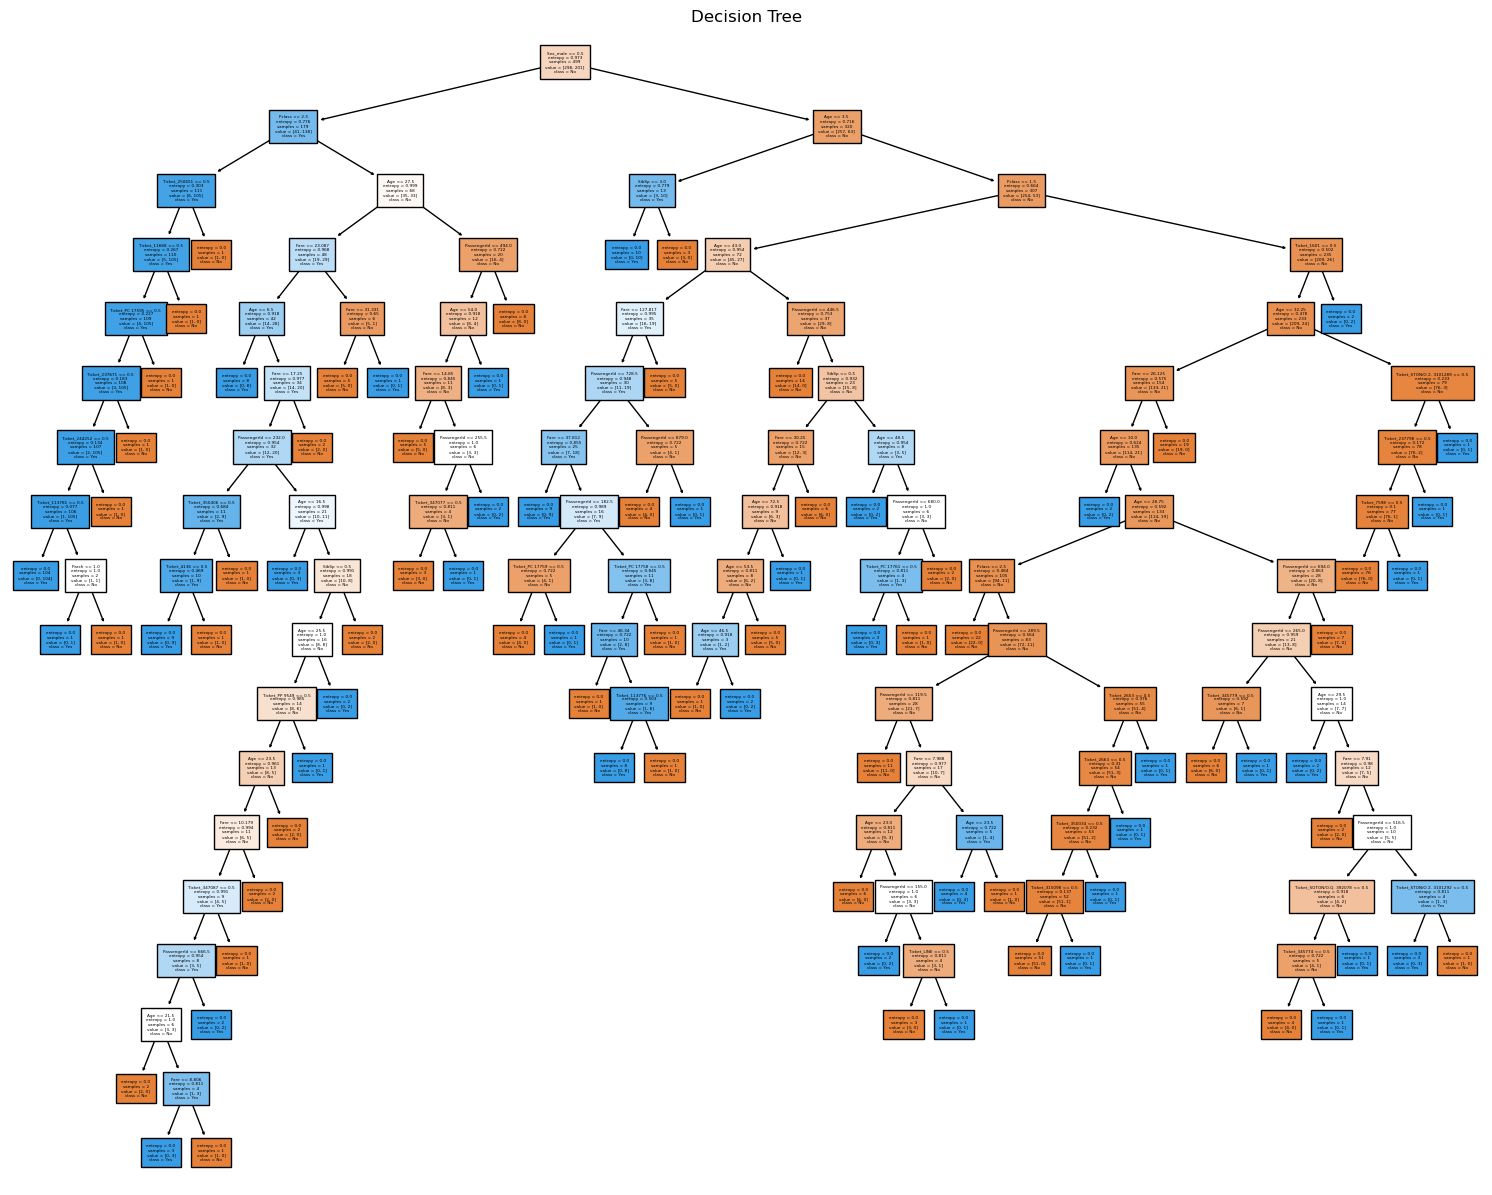

In [265]:
plt.figure(figsize=(19, 15))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize =3)
plt.title('Decision Tree')
plt.savefig('depth17.png', dpi=200)  # Save the plot as an image
plt.show()


In [266]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:",recall)

F1 Score: 0.7262569832402235
Accuracy: 0.772093023255814
Precision: 0.7222222222222222
Recall: 0.7303370786516854
